# Campus Recruitment

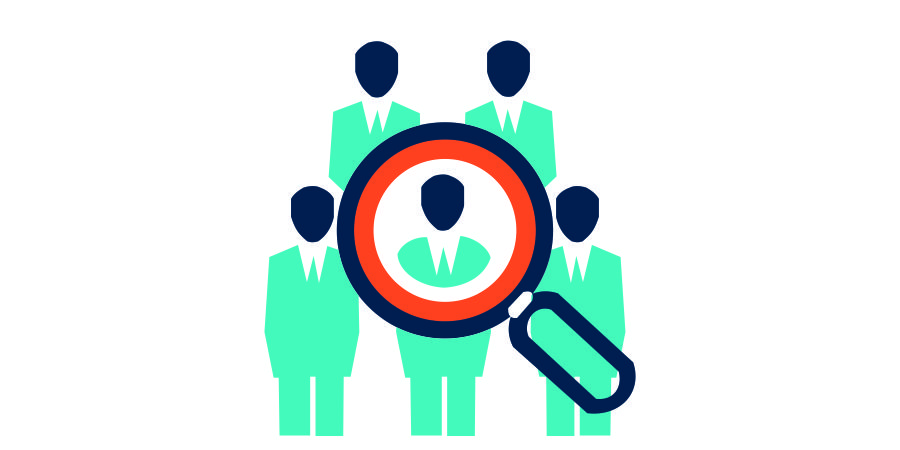

# Problem Statement

Campus placement is becoming highly competitive and there is immense load on colleges. This puts great pressures on the students if they are studying in some reputed college as the fear of not getting placed is constantly haunting them due to shallow fall in economy of country due to COVID-19. Here I will try to address the key dependencies of credentials earned from class 10th to current degree that would affect he chances of placement. Some key points undertaken are: -

1. Choice of board in class 10th and 12th to get placed.

2. Does gender effects the placements stats?

3. Work Experience, and internships effects.

4. What factors are responsible for not getting placed?

5. How does stream effects placement?

***

**At the end a model will be trained to perform predictive analysis**

***

The dataset can be accesed from <a href="https://www.kaggle.com/benroshan/factors-affecting-campus-placement" target="_blank">dataset</a> 

# Importing important libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54e06cdc6cfc432899e9d4fa43bc02b9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DT_-edsxxOTfCqqZolN-TE1RmaU4n1mZrCUQC3LMcNlF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_54e06cdc6cfc432899e9d4fa43bc02b9.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-zgrg2oycdglbye',Key='placement_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df = df_data_1
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.isnull().sum()

# Data Exploration

From info of the data, we can see the salary has only 148 entries and thus 67 entries are null value. This is due to the fact htat a guy is placed or not, thus for data cleansing ,we will remove the null values with some values helpful for us.(here zero)

In [4]:
#Replacing all the null values with zero
df['salary'].fillna(0, inplace = True)

Now we will be replacing the string values with integer values for our understanding, such as status will be rplaced by 1 for placed and 0 for unplaced

In [5]:
data = df

status = {'Placed': 1,'Not Placed': 0} 
data['status'] = [status[item] for item in data['status']] 

In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


In [7]:
def plot(data,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

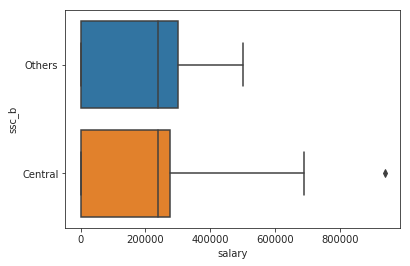

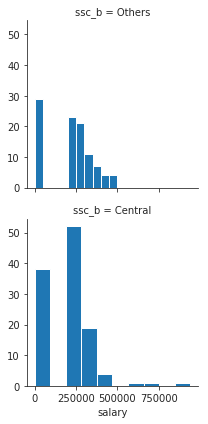

In [8]:
sns.set_style("ticks")
plot(data,"salary","ssc_b")

Although the median salary for both central and state board remains same, the highest package given is higher
for students of central board. This happens because co-curricular activities provided to students are far
better than those of state board. Prominently the stage fear and hesitation cause is removed for students coming
from central board schools. From the histogram, it is seen that unplaced students are more for central schools.However overall placement stats remains same, thus choice of board for class 10th doesn't affects much for the placement.

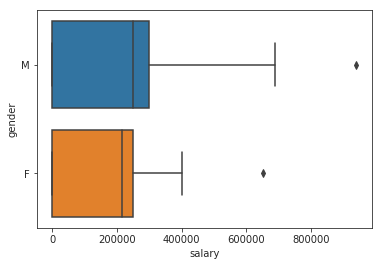

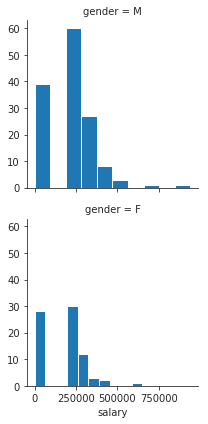

In [9]:
sns.set_style("ticks")
plot(data, "salary", "gender")


<a href = "https://seaborn.pydata.org/generated/seaborn.FacetGrid.html" target="_blank"> reference</a> code for above plots

As from the boxplot we can see median salary for boys is greater than girls and so is the highest package. From the histogram, the number of unplaced girls and boys are 30 and 40 respectively. Althoug the number of unplaed girls seems less, but compared to the strngth of males and females, it is relatively high. 

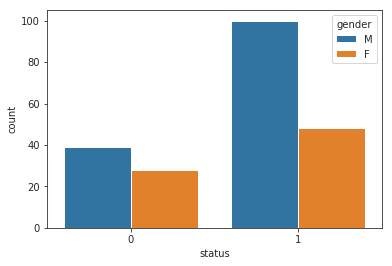

In [12]:
sns.countplot(data['status'],hue=data['gender'])

As we can see the number of placed students population of boys is higher than girls, although less number of girls did sit for the placement.This shows boys have slight better chance of getting hired than girls.

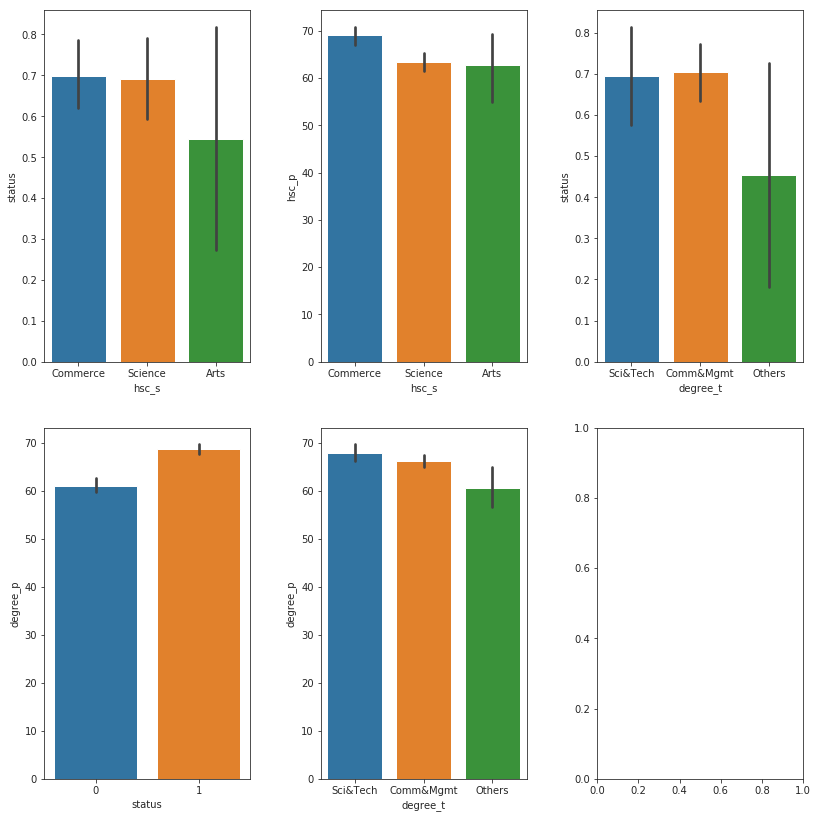

In [13]:
fig, axes = plt.subplots(2,3, figsize=(12,12))
sns.barplot(x="hsc_s", y="status", data=data, ax = axes[(0,0)] )
sns.barplot(x="hsc_s", y="hsc_p", data=data, ax = axes[(0,1)])
sns.barplot(x="degree_t", y="status", data=data, ax = axes[(0,2)])
sns.barplot(x="status", y="degree_p", data=data, ax = axes[(1,0)])
sns.barplot(x="degree_t", y="degree_p", data=data, ax = axes[(1,1)])
plt.tight_layout(pad = 3)

From above plots it is clear that number of jobs available for commerce and science students is greater than that of students for other streams. Also it can be seen, the scores of class 12th do effect abit, although the impact is not that much high. Also the score of degree affects the placement, however maintaining an average score is enough to land in good jobs.

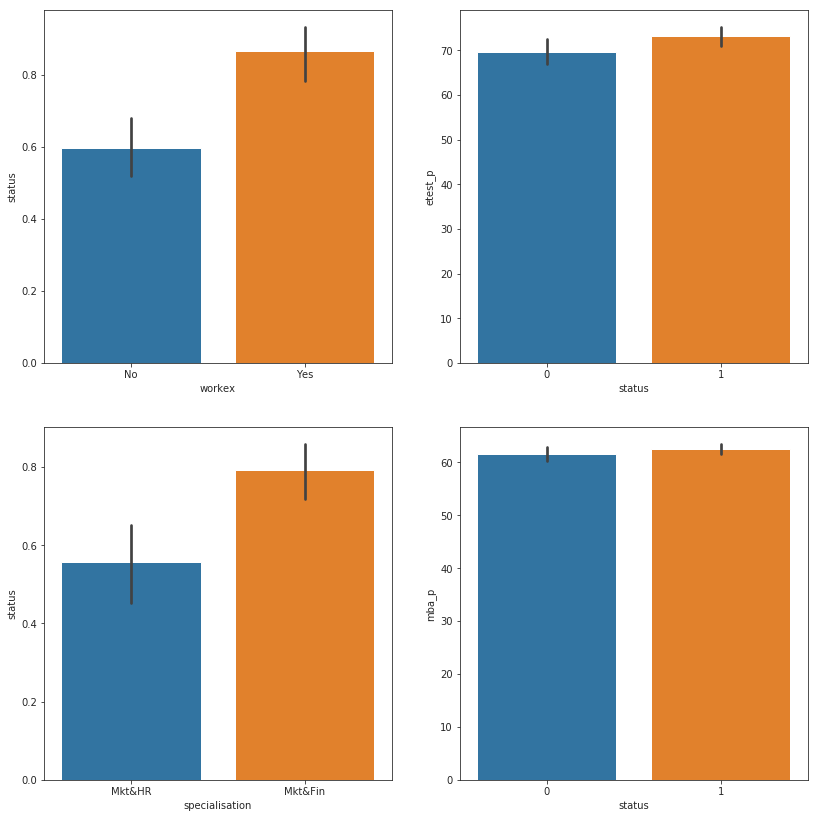

In [14]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
sns.barplot(x="workex", y="status", data=data, ax = axes[(0,0)])
sns.barplot(x="status", y="etest_p", data=data, ax = axes[(0,1)])
sns.barplot(x="specialisation", y="status", data=data, ax = axes[(1,0)])
sns.barplot(x="status", y="mba_p", data=data, ax = axes[(1,1)])
plt.tight_layout(pad = 3)

The first graph gives clear understanding that a work experience is preferred for getting into a good job,so one must go for good internships during college days. The employement test scores, doesn't matter much,and the scores of mba too, however a decent average score must be maintained. The marketing and finance student have more job opprtunities than H.R. for mba degree.

**Thus the key factor would be internship. Mostly the scores are discarded but they actually have some importance for the placement. Also chosing the stream puts huge impact for future growth of carrier**

# Data Preprocessing and Feature Engineering

1. Backward difference encoding of the categorical features and features containing texts.
2. Dropping the features not relevant or which puts less impact on the model.
3. Extracting important features if needed.
4. Using PCA/t-SNE for distribution visualization (if needed).
5. Standardizing the dataset before training.

In [15]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


## Encoding the data

In [16]:
# encoding for the features

import category_encoders as ce
encoder = ce.BackwardDifferenceEncoder(cols=['ssc_b', "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "gender"])
data_new = encoder.fit_transform(data)

data_new.head()


,intercept,sl_no,gender_0,ssc_p,ssc_b_0,hsc_p,hsc_b_0,hsc_s_0,hsc_s_1,degree_p,degree_t_0,degree_t_1,workex_0,etest_p,specialisation_0,mba_p,status,salary
0,1,1,-0.5,67.00,-0.5,91.00,-0.5,-0.666667,-0.333333,58.00,-0.666667,-0.333333,-0.5,55.0,-0.5,58.80,1,270000.0
1,1,2,-0.5,79.33,0.5,78.33,-0.5,0.333333,-0.333333,77.48,-0.666667,-0.333333,0.5,86.5,0.5,66.28,1,200000.0
2,1,3,-0.5,65.00,0.5,68.00,0.5,0.333333,0.666667,64.00,0.333333,-0.333333,-0.5,75.0,0.5,57.80,1,250000.0
3,1,4,-0.5,56.00,0.5,52.00,0.5,0.333333,-0.333333,52.00,-0.666667,-0.333333,-0.5,66.0,-0.5,59.43,0,0.0
4,1,5,-0.5,85.80,0.5,73.60,0.5,-0.666667,-0.333333,73.30,0.333333,-0.333333,-0.5,96.8,0.5,55.50,1,425000.0


the code for backward difference encoding is taken from the mentioned <a href="https://www.datacamp.com/community/tutorials/categorical-data" target="_blank">source </a> .
In dataset as shown above we have encoded the string categorical data with some encoded values, so that it becomes
relevant for models to learn. One hot encoding may suffer with the problem of curse of dimensionality, thus backward difference encoding is used.

## Dropping unneccessary features

In [17]:
#dropping unnecessary features
data_new.drop(['intercept','sl_no'], axis=1, inplace=True)

In [18]:
data_new.head()

,gender_0,ssc_p,ssc_b_0,hsc_p,hsc_b_0,hsc_s_0,hsc_s_1,degree_p,degree_t_0,degree_t_1,workex_0,etest_p,specialisation_0,mba_p,status,salary
0,-0.5,67.00,-0.5,91.00,-0.5,-0.666667,-0.333333,58.00,-0.666667,-0.333333,-0.5,55.0,-0.5,58.80,1,270000.0
1,-0.5,79.33,0.5,78.33,-0.5,0.333333,-0.333333,77.48,-0.666667,-0.333333,0.5,86.5,0.5,66.28,1,200000.0
2,-0.5,65.00,0.5,68.00,0.5,0.333333,0.666667,64.00,0.333333,-0.333333,-0.5,75.0,0.5,57.80,1,250000.0
3,-0.5,56.00,0.5,52.00,0.5,0.333333,-0.333333,52.00,-0.666667,-0.333333,-0.5,66.0,-0.5,59.43,0,0.0
4,-0.5,85.80,0.5,73.60,0.5,-0.666667,-0.333333,73.30,0.333333,-0.333333,-0.5,96.8,0.5,55.50,1,425000.0


## Extracting important features

In [19]:
x = data_new["salary"]

In [20]:
labels = data_new['status']
features = data_new.iloc[:, :-2 ]
features = pd.concat([features, x], axis=1, join='inner')
features.head()

,gender_0,ssc_p,ssc_b_0,hsc_p,hsc_b_0,hsc_s_0,hsc_s_1,degree_p,degree_t_0,degree_t_1,workex_0,etest_p,specialisation_0,mba_p,salary
0,-0.5,67.00,-0.5,91.00,-0.5,-0.666667,-0.333333,58.00,-0.666667,-0.333333,-0.5,55.0,-0.5,58.80,270000.0
1,-0.5,79.33,0.5,78.33,-0.5,0.333333,-0.333333,77.48,-0.666667,-0.333333,0.5,86.5,0.5,66.28,200000.0
2,-0.5,65.00,0.5,68.00,0.5,0.333333,0.666667,64.00,0.333333,-0.333333,-0.5,75.0,0.5,57.80,250000.0
3,-0.5,56.00,0.5,52.00,0.5,0.333333,-0.333333,52.00,-0.666667,-0.333333,-0.5,66.0,-0.5,59.43,0.0
4,-0.5,85.80,0.5,73.60,0.5,-0.666667,-0.333333,73.30,0.333333,-0.333333,-0.5,96.8,0.5,55.50,425000.0


In [21]:
labels.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(features, labels)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False  True False  True False  True  True  True False  True  True  True
 False  True  True]
Feature Ranking: [2 1 6 1 5 1 1 1 3 1 1 1 4 1 1]


The important features have been extracted and is stored in X_selected. We will use these features for training our ML algorithm and further look over the results. I chose 10 features important for the training purpose, although one is free to chose of its own.The important features for placement stats are: **["ssc_p", "hsc_p", "hsc_s_0", "hsc_s_1", "degree_p", "degree_t_1", "workex_0", "etest_p", "mba_p", "salary"]** To have some insights about features we will use dimensionality reductin in below setion and have look hoe much is the separability of the features is present.
The code snippet for feature selection is taken from https://machinelearningmastery.com/feature-selection-machine-learning-python/.

Some other sources from where help is taken for feature selection is https://www.datacamp.com/community/tutorials/feature-selection-python

We will keep only the 10 most important features for working further.

In [23]:
features.drop(["gender_0", "ssc_b_0", "hsc_b_0", "degree_t_0", "specialisation_0"], axis=1, inplace=True)
features.head()

,ssc_p,hsc_p,hsc_s_0,hsc_s_1,degree_p,degree_t_1,workex_0,etest_p,mba_p,salary
0,67.00,91.00,-0.666667,-0.333333,58.00,-0.333333,-0.5,55.0,58.80,270000.0
1,79.33,78.33,0.333333,-0.333333,77.48,-0.333333,0.5,86.5,66.28,200000.0
2,65.00,68.00,0.333333,0.666667,64.00,-0.333333,-0.5,75.0,57.80,250000.0
3,56.00,52.00,0.333333,-0.333333,52.00,-0.333333,-0.5,66.0,59.43,0.0
4,85.80,73.60,-0.666667,-0.333333,73.30,-0.333333,-0.5,96.8,55.50,425000.0


## Applying t-SNE and using it for getting insight of features

In [24]:
df_final = features
df_final.to_numpy()
distinct_labels = list(set(labels))
distinct_labels

[0, 1]

Text(0.5, 1.0, ' t-SNE plot')

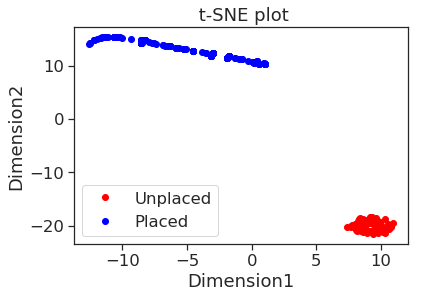

In [25]:
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects

y = labels
X_raw = df_final
y_raw = np.array(y, dtype = 'int')
tsne = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)
X_2d = tsne.fit_transform(X_raw)
X1 = X_2d[:,0:1]
Y1 = X_2d[:,1:2]

sns.set_style('ticks')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


category_to_color = {0: 'red', 1: 'blue'}
category_to_label = {0: 'Unplaced', 1:"Placed"}

fig, ax = plt.subplots(1,1)
for category, color in category_to_color.items():
    mask = y == category
    ax.plot(X_2d[mask, 0], X_2d[mask, 1], 'o',
            color=color, label=category_to_label[category], ms = 6)

ax.legend(loc='best')
ax.axis('on')
ax.axis('tight')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title(' t-SNE plot')

Looking at the above t-SNE plot it is very easy to conclude that features are separable, also the two classes are shown. Now we will move further to train models and do predictive analysis and verify models by using different metrices for our classifiers or regressor models. Before this there is one last step of normalizing the dataset so that all the values lies in a particular range for the robustness of our model.Also we will look at the pairplots of the features to have a look at little dependencies of features on each other.

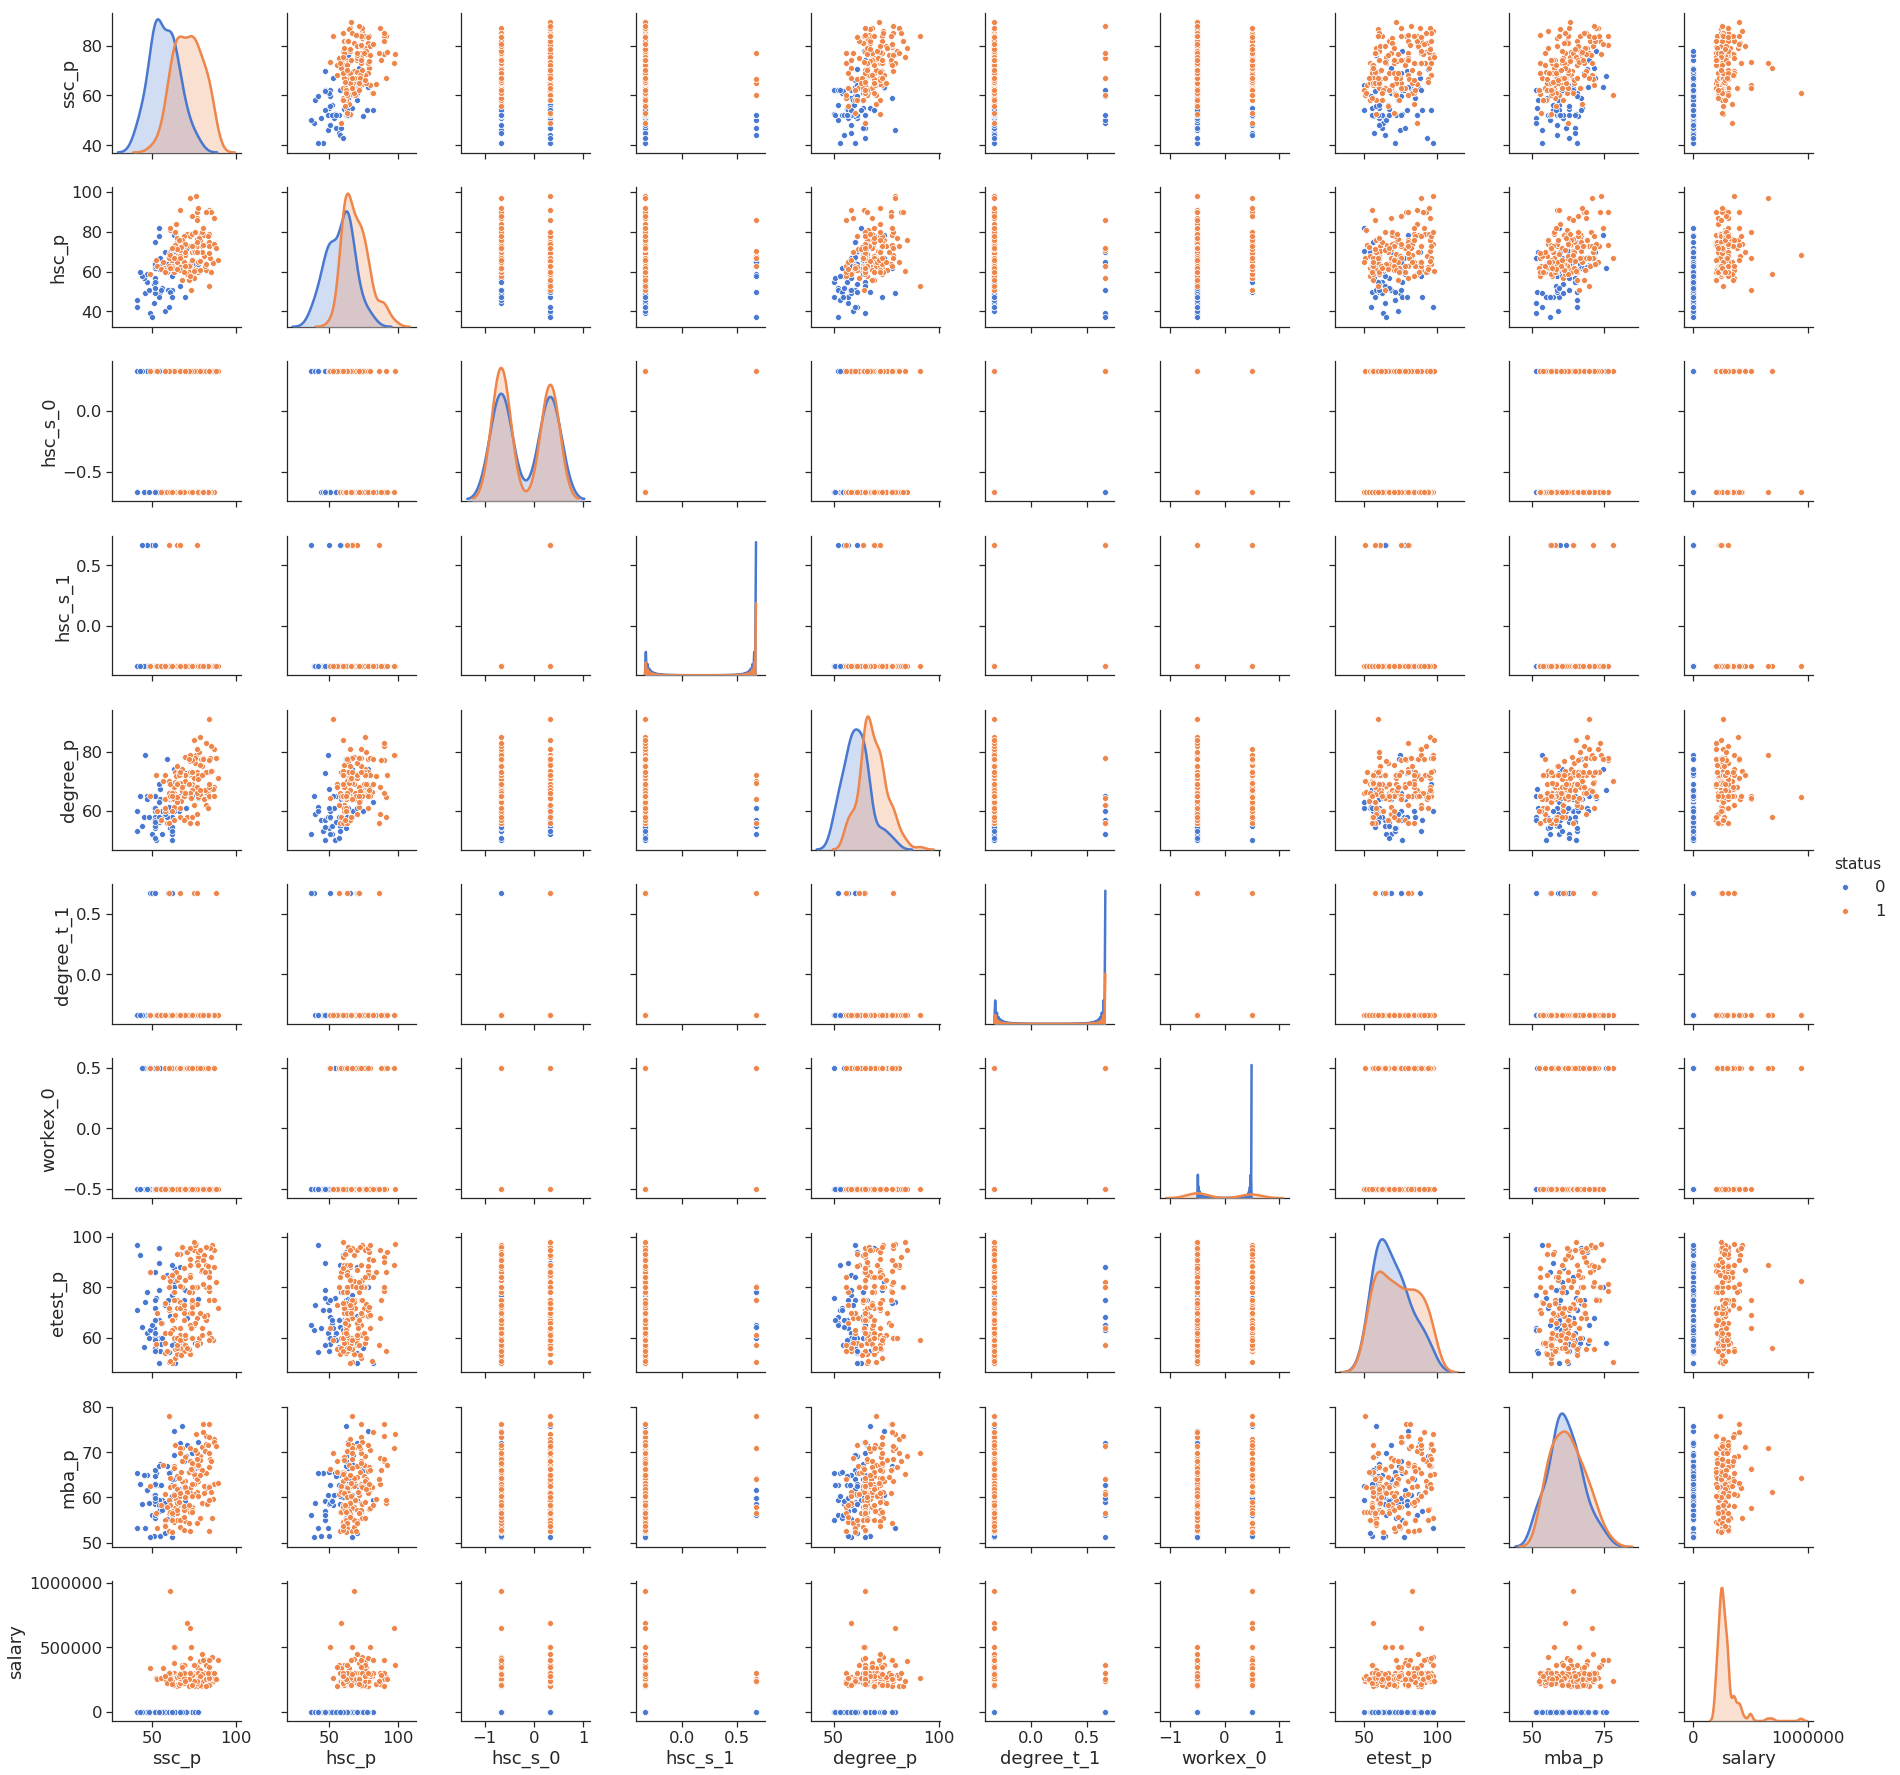

In [26]:
df_plot = pd.concat([features, labels], axis=1, join='inner')
sns.pairplot(df_plot, vars=df_plot.columns[:-1], hue = 'status')

## Standardizing the data

In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(X_raw)
y = y_raw

# Training different classifiers and measuring the accuracy values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.18)

In [29]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)
predictions1 = model1.predict(x_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [30]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

predictions2 = model2.predict(x_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [31]:
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)

predictions3 = model3.predict(x_test)
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [32]:
model4 = XGBClassifier()
model4.fit(x_train,y_train)
predictions4 = model4.predict(x_test)
print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [33]:
model5 = GaussianNB()
model5.fit(x_train,y_train)
predictions5 = model5.predict(x_test)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [34]:
#neural network classifier
model6 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model6.fit(x_train,y_train)
predictions6 = model6.predict(x_test)
print(confusion_matrix(y_test,predictions6))
print(classification_report(y_test,predictions6))

[[15  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Looking at the confusion matrix, it appears that all the models are performing exceptionally well. Some reasons which I can think of is: - 
1. Since addressing the case of placed and unplaced becomes binary classification problem, so most of the models are able to perform well as the dataset size is too small.
2. The t-SNE plot shows that both the classes are ar too apart and thus the features are searable, due to which complexity has almost gone down.
3. Feature selection step extracts only the most important features, due to which the data becomes quite clean for training purpose.
4. Also the presence of outlier is not there or is minimal as we can see from the plots above.

# Regression for predicting salary

After looking at the classification model, we are assure that models are performing well for this binary classification task for predicting whether soeone will be placed or not, however let's have a different look at the problem and try to predict the salary a student would recieve depending on the important features we have. in this we will use Ensemble models for regression purpose and analyze the prformance of the models.

In [35]:
#preparing the data for regression
data_reg =features
data_reg.head()

,ssc_p,hsc_p,hsc_s_0,hsc_s_1,degree_p,degree_t_1,workex_0,etest_p,mba_p,salary
0,67.00,91.00,-0.666667,-0.333333,58.00,-0.333333,-0.5,55.0,58.80,270000.0
1,79.33,78.33,0.333333,-0.333333,77.48,-0.333333,0.5,86.5,66.28,200000.0
2,65.00,68.00,0.333333,0.666667,64.00,-0.333333,-0.5,75.0,57.80,250000.0
3,56.00,52.00,0.333333,-0.333333,52.00,-0.333333,-0.5,66.0,59.43,0.0
4,85.80,73.60,-0.666667,-0.333333,73.30,-0.333333,-0.5,96.8,55.50,425000.0


In [36]:
x_feat = data_reg.iloc[:,:-1]
y_target = data_reg['salary']
x_reg = x_feat
x_reg.to_numpy()
y_reg = np.array(y_target, dtype = 'int')
scale = preprocessing.StandardScaler()
x_reg = scale.fit_transform(x_reg)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size = 0.18)

In [45]:
reg1 = XGBRegressor(learning_rate=0.01, n_estimators=2500)
reg2 = RandomForestRegressor(n_estimators=2500)
reg1_scores = cross_val_score(reg1, x_train, y_train, cv=10)
reg2_scores = cross_val_score(reg2, x_train, y_train, cv=10)
print("XGB Regression: ",np.mean(reg1_scores))
print("Random Forest Regression: ",np.mean(reg2_scores))


XGB Regression:  0.09515547769414619
Random Forest Regression:  0.2183246266865846


Looking at the cross validation scores, it appears that models are not performing well, however we will move further with predictions to look at the actual results of our models.

In [46]:
#predicting

reg1.fit(x_train, y_train)
pred_1 = reg1.predict(x_test)
print(reg1.score(x_test, y_test))


reg2.fit(x_train, y_train)
pred_2 = reg2.predict(x_test)
print(reg2.score(x_test, y_test))


-0.016194850566929375
0.17444084065138607


The scores seems to be low and thus our models are not performing upto the mark for predicting the values.


In [47]:
df1_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_1.flatten()})
df1_pred

,Actual,Predicted
0,0,80481.140625
1,0,-7366.356445
2,270000,330710.062500
3,0,3664.799316
4,300000,289396.375000
5,300000,338565.343750
6,0,68406.445312
7,0,245403.781250
8,0,225193.390625
9,250000,11468.631836


In [48]:
df2_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_2.flatten()})
df2_pred

,Actual,Predicted
0,0,123120.8
1,0,1452.0
2,270000,301697.6
3,0,15414.0
4,300000,256520.4
5,300000,242260.0
6,0,64222.4
7,0,280360.8
8,0,161993.6
9,250000,70672.8


Looking at actual and predicted values, it appears that the result is fairly bad, as the students who are not placed, receive decent amount according to predicted result. This may be a hypothetical case, when of'ourse the student is placed with all those credentials, and would earn a nearby same salary. However the results are not consistent with the dataset, and thus we cannot rely on machine learning model to actually assume or expect some salary figures from the recruiters.
This concludes our analysis on the recruitment dataset, where we tried to address the problem of classification and regression and came to a conclusion.

# Conclusion and Discussion
1. We can say that for classification model, the results are pretty well and if the student has some decent credentials in college and better 12th score, there might be chances of earning good salary job.
2. The gender is taken into factor for placement, however it is very less.
3. With regression analysis, it came to us that an out of the box thinking and extra effort is needed to earn a decent salary, not just the degree, and marks.
4. Co- curriculars do affects as it adds to the holistic personality of the student.
5. Most important point is work experience and internships do effects the placements and obviously one must go for it during college days.
6. Another key factor is stream choice as science and commerce have better jobs than arts, however only chosing a stream won't help to earn decent,rather one must take into account above mentioned factors.